# Topic Modeling with Latent Dirichlet Allocation (LDA)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models

C:\Users\swaro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
# Ensure NLTK resources are downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\swaro\AppData\Roaming\nltk_data...


True

In [7]:
# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess text by tokenizing, removing stopwords, and lemmatizing."""
    tokens = word_tokenize(str(text).lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

print("Preprocessing text...")
processed_data = [preprocess_text(doc) for doc in data]
print("Preprocessing complete.")

Preprocessing text...
Preprocessing complete.


In [8]:
# Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Preprocess text by tokenizing, removing stopwords, and lemmatizing."""
    tokens = word_tokenize(str(text).lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return tokens

print("Preprocessing text...")
processed_data = [preprocess_text(doc) for doc in data]
print("Preprocessing complete.")

Preprocessing text...
Preprocessing complete.


In [9]:
# Create dictionary and corpus for LDA
print("Creating dictionary and corpus...")
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]
print(f"Dictionary and corpus created. Dictionary size: {len(dictionary)} unique tokens.")

Creating dictionary and corpus...
Dictionary and corpus created. Dictionary size: 95812 unique tokens.


In [10]:
# Build LDA model
num_topics = 10  # Number of topics
print(f"Training LDA model with {num_topics} topics...")
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
print("LDA model training complete.")

Training LDA model with 10 topics...
LDA model training complete.


In [11]:
# Visualize topics with pyLDAvis
print("Preparing pyLDAvis visualization...")
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(lda_vis, 'lda_topics.html')
print("pyLDAvis visualization saved to 'lda_topics.html'.")

Preparing pyLDAvis visualization...
pyLDAvis visualization saved to 'lda_topics.html'.


Generating word clouds for each topic...


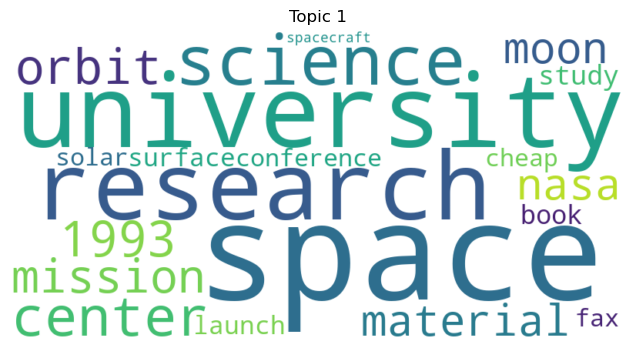

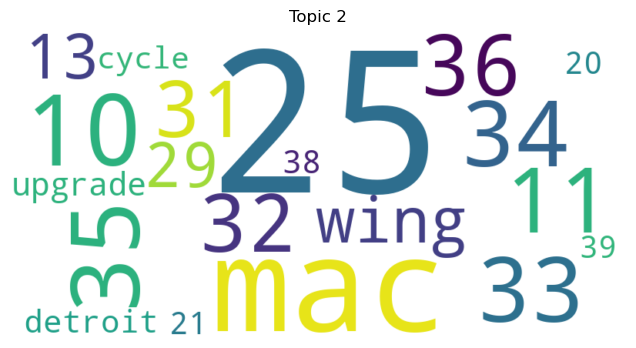

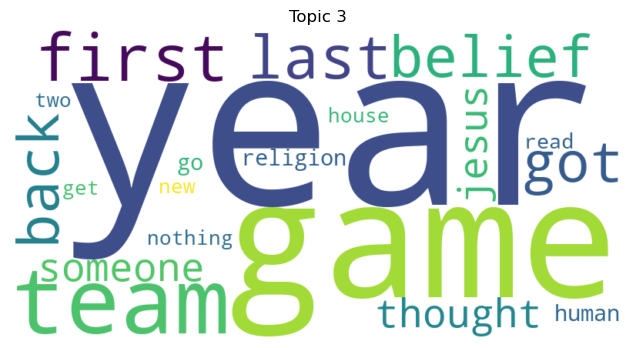

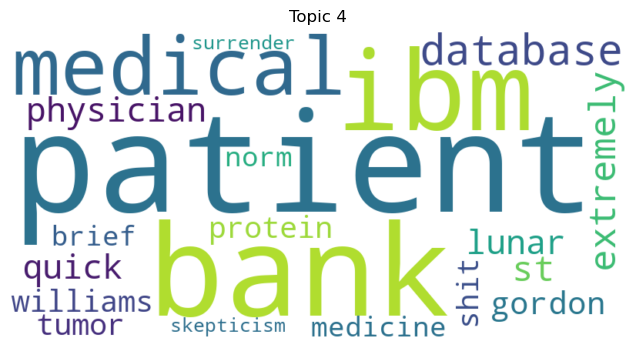

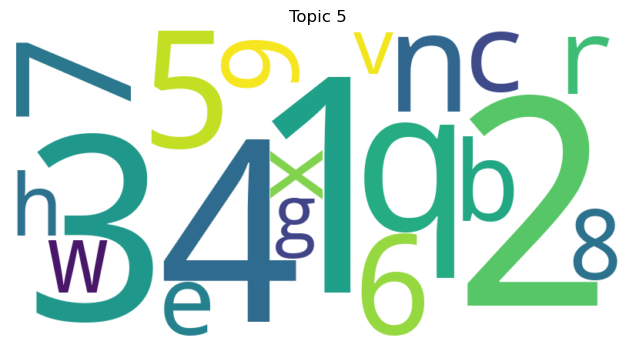

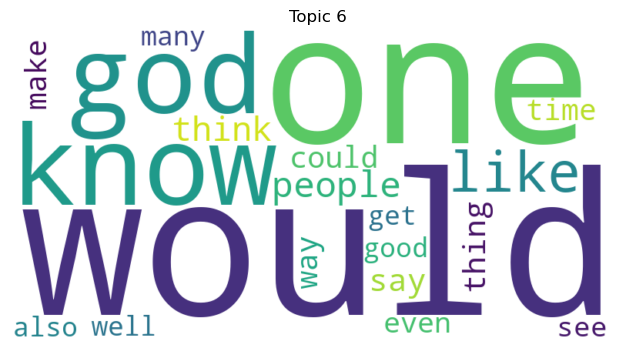

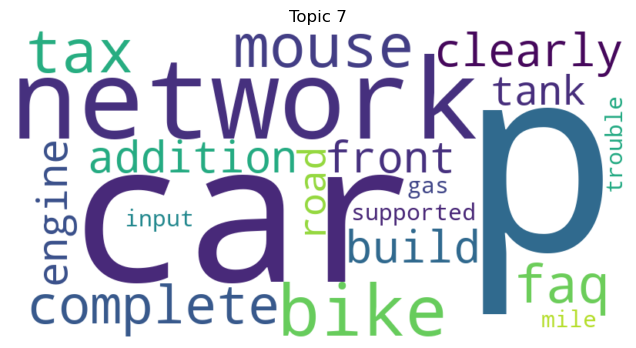

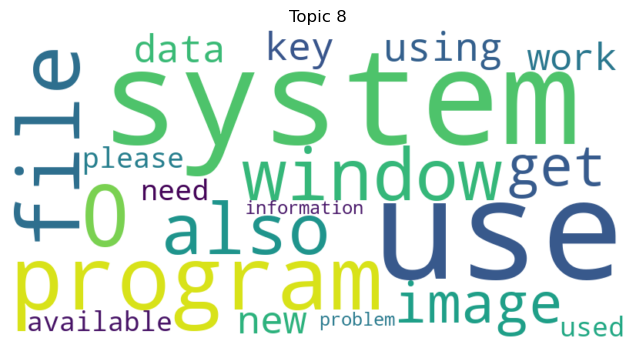

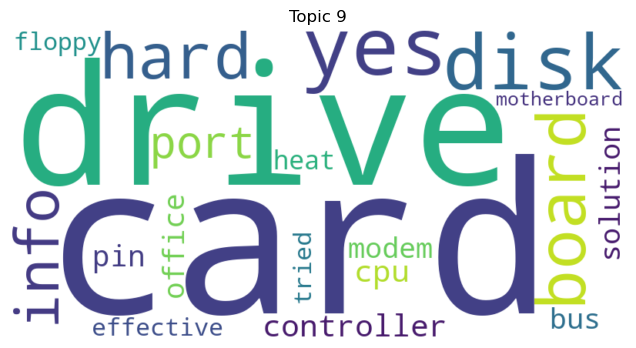

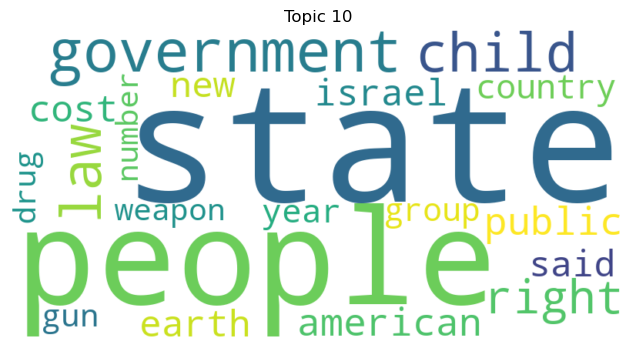

In [12]:
# Display wordclouds for each topic
print("Generating word clouds for each topic...")
for topic_id in range(num_topics):
    topic_terms = lda_model.show_topic(topic_id, topn=20)
    topic_words = {term: weight for term, weight in topic_terms}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic_id + 1}")
    plt.show()

In [13]:
# Example: Display top 5 topics for a sample document
sample_doc_id = 0
print(f"\nTop topics for sample document {sample_doc_id + 1}:")
topics = lda_model.get_document_topics(corpus[sample_doc_id])
topics = sorted(topics, key=lambda x: x[1], reverse=True)  # Sort by probability
for topic_id, prob in topics[:5]:
    print(f"Topic {topic_id + 1}: Probability {prob:.2f}")


Top topics for sample document 1:
Topic 3: Probability 0.56
Topic 6: Probability 0.20
Topic 8: Probability 0.10
Topic 5: Probability 0.07
Topic 10: Probability 0.05
